# Final Project 1: Regression -Linear Regression

Dikumpulkan sebagai salah satu syarat untuk memenuhi tugas Introduction Python for Data Science

**Anggota Kelompok**
1. Erika Taniya Devi Winckler (PYTN-KS14-020)
2. ANAK AGUNG INTEN CAHYANI DEWI (PYTN-KS14-021)
3. NI NYOMAN SEKAR WANDANI (PYTN-KS14-024)

# OverView

<p style='text-align: justify;'>
Kebutuhan akan Jasa transportasi online telah menjadi salah satu kebutuhan dasar manusia karena mempermudah manusia melakukan mobilitas. Dengan adanya jasa transportasi online masyarakat dengan mudah memilih mode transportasi yang akan digunakan melalui aplikasi yang tersedia pada telepon genggam. Tingginya permintaan akan layanan transportasi online saat ini yang menghadirkan perusahaan-perusahaan yang menyediakan layanan jasa tranportasi seperti uber dan lyft.

<p style='text-align: justify;'>
     Dataset yang digunakan berasal dari Kaggle yang memiliki beragam variasi data seperti destinasi/ tujuan, temperature, cuaca, harga, dan jarak yang ditempuh. Oleh sebab itu diperlukan sebuah aplikasi yang dirancang untuk melihat variasi harga pada masing-masing transportasi online untuk mempermudah masyarakat memilih moda transportasi online dengan pelayanan baik tetapi dengan harga yang terjangkau. Salah satu cara yang dilakukan untuk mencapai tujuan tersebut ialah membuat model dengan metode linear regression dan menggunakan metode perbandingan yaitu Random Forest Regressor dan Decion Tree Regressor.



 

## Data Description

<p style='text-align: justify;'>
    Pada dataset yang digunakan pada Uber dan Lyft di New York, USA yang didapatkan dari Kaggle, . Terdapat 57 atribut yang tersedia, namun hanya 10 atribut yang digunakan. Berikut ini merupakan beberapa atribut yang tersedia.


- **Cab_type**: Jenis transportasi online yang digunakan 
- **Name**: Tipe mobil yang digunakan (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, Black, UberX, WAV, Lux Black, Shared) 
- **Hour**: Menunjukkan waktu pemesanan transportasi online (24 jam) 
- **Day**: Menunjukkan tanggal pemesanan transportasi online
- **Month**: Menunjukkan bulan pemesanan transportasi online (Bulan ke-11 dan Bulan ke-12) 
- **Source**: Titik awal penjemputan
- **Destination**: Tujuan akhir pengantaran 
- **Price**: Tarif transportasi online (USD)
- **Distance**: Jarak yang ditempuh (Km)
- **Short_Summary**: Kondisi cuaca ketika melakukan pemesanan taksi online (Overcast, Mostly Cloudy, Partly Cloudy, Clear, Light Rain, Rain, Possible Drizzle, Foggy, Drizzle)
- **Temperature**: Suhu udara ketika melakukan pemesanan transportasi online (Degree Celsius) 
- **Visibility**: Jarak pandang pengelihatan
- **Surge_Multipler**: Lonjakan harga penawaran ketika terdapat lonjakan penumpang


## objective

Pada kasus ini, tujuan atau objective yang ingin dicapai antara lain sebagai berikut: 
- Mampu mengetahui faktor  yang mempengaruhi dalam memprediksi tarif harga transportasi online 
- Mampu mengetahui nilai akurasi pada model pengujian yang digunakan untuk memprediksi tarif transportasi online.
- Mampu mengetahui model yang baik dengan best configuration untuk memprediksi harga transportasi online. 

In [50]:
!conda install -c anaconda xlrd --yes

'conda' is not recognized as an internal or external command,
operable program or batch file.


## Import Library yang dibutuhkan

In [51]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
import plotly.express as px
import scipy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

pd.options.display.max_rows = None 
pd.options.display.max_columns = None

import pickle

## Data Loading

In [5]:
df_c = pd.read_csv(r'D:\Kuliah (D)\MBKM2023\Hactiv8\PYTN_KampusMerdeka_fp1_Erika Taniya Devi Winckler\dataset\rideshare_kaggle.csv')

                  
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [6]:
#Melihat 5 baris pertama dari dataframe
df_c.head(5)

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [7]:
# df.to_excel("data tubes.xlsx")

In [8]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [9]:
#Menghitung nilai unique pada data
df_c.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [10]:
#Melihat statistik data numerik seperti mean, count, standard deviation, maximum , minimum, dan nilai quartile
df_c.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  apparentTemperature  precipIntensity  \
count  693071.000000  693071.000000        693071.000000    693071.000000   
mean      -71.066151      39.584388            35.881222         0.008922   
std         0.020302       6.726084             7.918707         0.026901   
min       -71.105400      18.910000            12.130000         0.000000   
25%       -71.081000      36.450000            31.910000         0.000000   
50%       -71.063100      40.490000            35.900000         0.000000   
75%       -71.054200      43.580000            40.080000         0.000000   
max       -71.033000      57.220000            57.220000         0.144700   

       precipProbability       humidity      windSpeed       windGust  \
count      693071.000000  693071.000000  693071.000000  693071.000000   
mean            0.146076       0.741119       6.186253       8.469860   
std             0.328938       0.138595       3.148223       5.289179   
min             0.000000       0.380000       0.450000       0.800000   
25%             0.000000       0.640000       3.410000       4.060000   
50%             0.000000       0.710000       5.910000       7.550000   
75%             0.000000       0.880000       8.410000      11.740000   
max             1.000000       0.960000      15.000000      27.250000   

       windGustTime     visibility  temperatureHigh  temperatureHighTime  \
count  6.930710e+05  693071.000000    693071.000000         6.930710e+05   
mean   1.544049e+09       8.467970        45.040982         1.544050e+09   
std    6.928244e+05       2.602888         5.996541         6.937921e+05   
min    1.543151e+09       0.717000        32.680000         1.543154e+09   
25%    1.543432e+09       8.432000        42.570000         1.543439e+09   
50%    1.543756e+09       9.880000        44.680000         1.543788e+09   
75%    1.544846e+09       9.996000        46.910000         1.544814e+09   
max    1.545127e+09      10.000000        57.870000         1.545160e+09   

       temperatureLow  temperatureLowTime  apparentTemperatureHigh  \
count   693071.000000        6.930710e+05            693071.000000   
mean        34.150736        1.544102e+09                41.614054   
std          6.383163        6.922923e+05                 7.666138   
min         17.850000        1.543234e+09                22.620000   
25%         30.170000        1.543489e+09                36.570000   
50%         34.180000        1.543817e+09                40.950000   
75%         38.730000        1.544836e+09                44.120000   
max         46.600000        1.545221e+09                57.200000   

       apparentTemperatureHighTime  apparentTemperatureLow  \
count             

In [11]:
#Mengecek missing value 

df_c.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [12]:
#Mengecek data duplikat
df_c.duplicated().sum()

0

# Data Cleaning

In [13]:
#Menghapus data yang terdapat missing values
data_cleaning = df_c.dropna()
data_cleaning.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [14]:
#Mengecek missing value setelah dilakukan cleaning 
data_cleaning.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [15]:
##Membuat crosstab pada pandas dengan index cab_type dan columns name

pd.crosstab(data_cleaning.cab_type, data_cleaning.name)

name      Black  Black SUV    Lux  Lux Black  Lux Black XL   Lyft  Lyft XL  \
cab_type                                                                     
Lyft          0          0  51235      51235         51235  51235    51235   
Uber      55095      55096      0          0             0      0        0   

name      Shared  UberPool  UberX  UberXL    WAV  
cab_type                                          
Lyft       51233         0      0       0      0  
Uber           0     55091  55094   55096  55096

* pada crosstab diatas dapat dilihat bahwa kolom yang digunakan yaitu cab_type, name, hour, day, month, destination, price, source, wind speed, temperature,visibility 

In [16]:
#Mengambil fitur-fitur yang akan digunakan untuk permodelan dan menyimpannya dalam variabel baru

col_group = [
    "cab_type", 
    "name", 
    "hour", 
    "day",
    "month",
    "source", 
    "destination", 
    "price", 
    "distance", 
    "short_summary",
    "windSpeed",
    "temperature", 
    "visibility",
    "surge_multiplier"
]

In [17]:
data_group = data_cleaning[col_group]
data_group.head()

cab_type          name  hour  day  month            source    destination  \
0     Lyft        Shared     9   16     12  Haymarket Square  North Station   
1     Lyft           Lux     2   27     11  Haymarket Square  North Station   
2     Lyft          Lyft     1   28     11  Haymarket Square  North Station   
3     Lyft  Lux Black XL     4   30     11  Haymarket Square  North Station   
4     Lyft       Lyft XL     3   29     11  Haymarket Square  North Station   

   price  distance    short_summary  windSpeed  temperature  visibility  \
0    5.0      0.44   Mostly Cloudy        8.66        42.34      10.000   
1   11.0      0.44            Rain       11.98        43.58       4.786   
2    7.0      0.44           Clear        7.33        38.33      10.000   
3   26.0      0.44           Clear        5.28        34.38      10.000   
4    9.0      0.44   Partly Cloudy        9.14        37.44      10.000   

   surge_multiplier  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0

In [18]:
data_group.rename(columns={ 'cab_type': 'transportation_name','name': 'type of car', 'hour': 'time', 'source': 'start point', 'destination': 'end point', 'short_summary': 'weather'}, inplace=True)
data_group.columns

C:\Users\Erika Winckler\AppData\Local\Temp\ipykernel_6996\1819786628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group.rename(columns={ 'cab_type': 'transportation_name','name': 'type of car', 'hour': 'time', 'source': 'start point', 'destination': 'end point', 'short_summary': 'weather'}, inplace=True)


Index(['transportation_name', 'type of car', 'time', 'day', 'month',
       'start point', 'end point', 'price', 'distance', 'weather', 'windSpeed',
       'temperature', 'visibility', 'surge_multiplier'],
      dtype='object')

In [19]:
data_group.head()

transportation_name   type of car  time  day  month       start point  \
0                Lyft        Shared     9   16     12  Haymarket Square   
1                Lyft           Lux     2   27     11  Haymarket Square   
2                Lyft          Lyft     1   28     11  Haymarket Square   
3                Lyft  Lux Black XL     4   30     11  Haymarket Square   
4                Lyft       Lyft XL     3   29     11  Haymarket Square   

       end point  price  distance          weather  windSpeed  temperature  \
0  North Station    5.0      0.44   Mostly Cloudy        8.66        42.34   
1  North Station   11.0      0.44            Rain       11.98        43.58   
2  North Station    7.0      0.44           Clear        7.33        38.33   
3  North Station   26.0      0.44           Clear        5.28        34.38   
4  North Station    9.0      0.44   Partly Cloudy        9.14        37.44   

   visibility  surge_multiplier  
0      10.000               1.0  
1       4.786               1.0  
2      10.000               1.0  
3      10.000               1.0  
4      10.000               1.0

# EDA (Exploration Data and Analysis)

In [20]:
data_group.describe()

time            day          month          price  \
count  637976.000000  637976.000000  637976.000000  637976.000000   
mean       11.618528      17.797674      11.586550      16.545125   
std         6.948776       9.982083       0.492452       9.324359   
min         0.000000       1.000000      11.000000       2.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      13.500000   
75%        18.000000      28.000000      12.000000      22.500000   
max        23.000000      30.000000      12.000000      97.500000   

            distance      windSpeed    temperature     visibility  \
count  637976.000000  637976.000000  637976.000000  637976.000000   
mean        2.189261       6.186795      39.582406       8.469180   
std         1.135413       3.147856       6.725500       2.601828   
min         0.020000       0.450000      18.910000       0.717000   
25%         1.270000       3.410000      36.450000       8.432000   
50%         2.160000       5.910000      40.490000       9.880000   
75%         2.930000       8.410000      43.580000       9.996000   
max         7.860000      15.000000      57.220000      10.000000   

       surge_multiplier  
count     637976.000000  
mean           1.015068  
std            0.095422  
min            1.000000  
25%            1.000000  
50%            1.000000  
75%            1.000000  
max            3.000000

**kesimpulan**:
Berdasarkan info data diatas, dapat ditarik kesimpulan sebagai berikut:
- Rata-rata harga yang harus dibayarkan untuk menggunakan layanan tranportasi online sebesar 16.5 dollar. 
- Tarif paling murah yang dibayarkan pada penggunaan layanan transportasi online sebesar 2.5 Dollar
- Rata-rata temperatur saat pemesanan layanan transportasi online sebesar 39.5 deg F

In [21]:
#Membuat variabel data_transport_name berisi total data dari kolom transportation_name
data_transport_name = data_group['transportation_name'].value_counts()
data_transport_name

Uber    330568
Lyft    307408
Name: transportation_name, dtype: int64

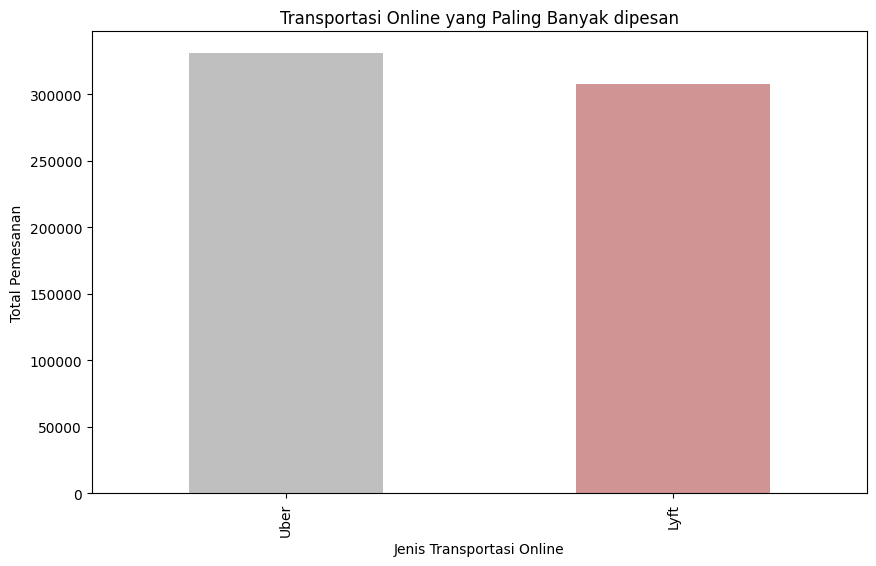

In [22]:
data_transport_name.plot(kind='bar', figsize=(10,6), color=['gray','brown'], alpha=0.5)

plt.xlabel('Jenis Transportasi Online')
plt.ylabel('Total Pemesanan')
plt.title('Transportasi Online yang Paling Banyak dipesan')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan**: 
- Pada plot bar di atas, dapat dilihat bahwa jenis transportasi online yang paling banyak dipesan ialah Uber yaitu sebesar 330568 kali dipesan, sedangkan Lyft sebesar 307408 kali dipesan.

In [23]:
#Membuat variabel data_month_analysis berisi total data dari kolom month 
data_month_analysis = data_group['month'].value_counts()
data_month_analysis

12    374205
11    263771
Name: month, dtype: int64

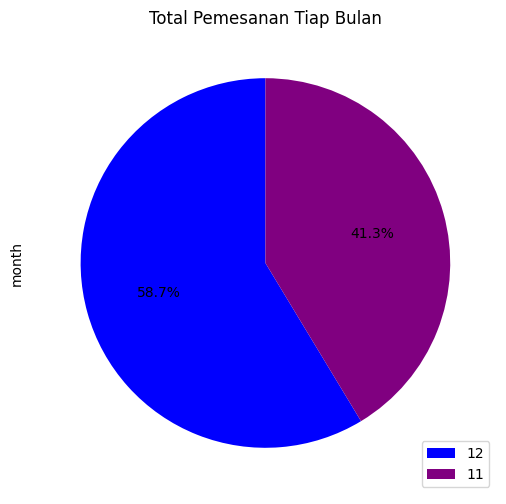

In [24]:
# Membuat plot grafik pemesanan transportasi online
pie_color=['blue','purple']
data_month_analysis.plot(kind='pie', figsize=(10,6), startangle= 90, autopct="%1.1f%%", labels=None, colors =pie_color)

plt.title('Total Pemesanan Tiap Bulan')
plt.legend(labels=data_month_analysis.index)

# Save Plot
plt.savefig("month_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan**: 
- Pada plot grafik pemesanan transportasi online di atas hanya terlihat bulan 12 dan bulan 11 yang tercatat. Dari kedua bulan ini, bulan 12 memiliki total pemesanan transportasi online tertinggi yaitu sebesar 58.7%  dipesan. Sedangkan pada bulan 11 dipesan sebanyak 41.3%. 

In [25]:
#Membuat kolom route berisi data dari start point sampai end point
data_group['route'] = data_group["start point"] + "-" + data_group["end point"]
data_group.head()

C:\Users\Erika Winckler\AppData\Local\Temp\ipykernel_6996\4218161862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group['route'] = data_group["start point"] + "-" + data_group["end point"]


transportation_name   type of car  time  day  month       start point  \
0                Lyft        Shared     9   16     12  Haymarket Square   
1                Lyft           Lux     2   27     11  Haymarket Square   
2                Lyft          Lyft     1   28     11  Haymarket Square   
3                Lyft  Lux Black XL     4   30     11  Haymarket Square   
4                Lyft       Lyft XL     3   29     11  Haymarket Square   

       end point  price  distance          weather  windSpeed  temperature  \
0  North Station    5.0      0.44   Mostly Cloudy        8.66        42.34   
1  North Station   11.0      0.44            Rain       11.98        43.58   
2  North Station    7.0      0.44           Clear        7.33        38.33   
3  North Station   26.0      0.44           Clear        5.28        34.38   
4  North Station    9.0      0.44   Partly Cloudy        9.14        37.44   

   visibility  surge_multiplier                           route  
0      10.000               1.0  Haymarket Square-North Station  
1       4.786               1.0  Haymarket Square-North Station  
2      10.000               1.0  Haymarket Square-North Station  
3      10.000               1.0  Haymarket Square-North Station  
4      10.000               1.0  Haymarket Square-North Station

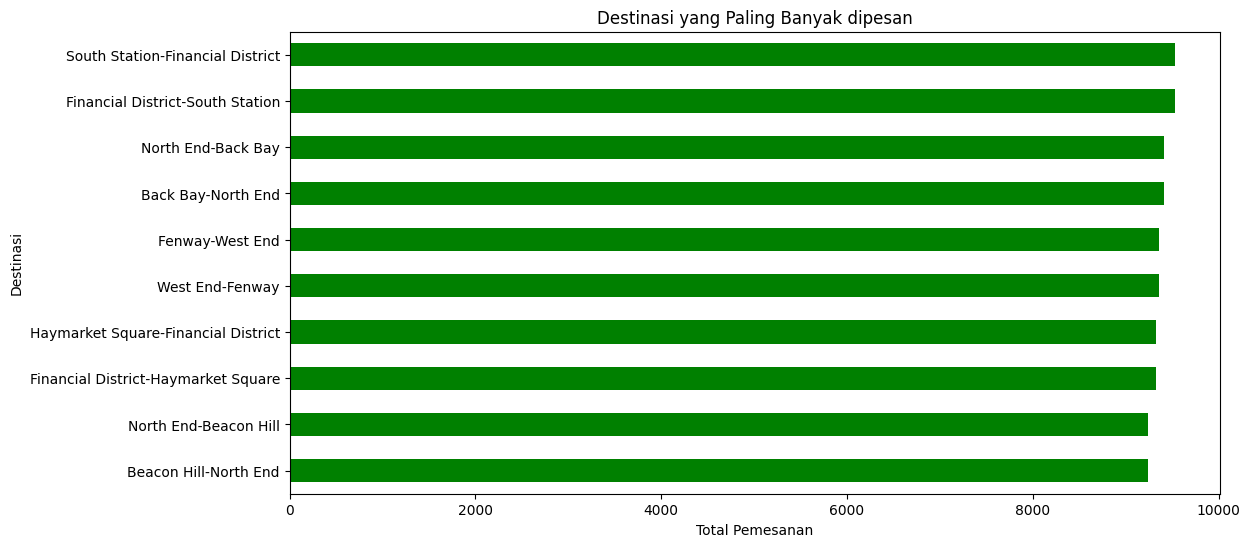

In [26]:
#Membuat variable route berisi kolom route dalam bentuk horizontal bar chart 
rute = data_group['route'].value_counts()

rute_sort = rute[0:10].sort_values()
rute_sort.plot(kind='barh', figsize=(12,6), color='green')

plt.xlabel('Total Pemesanan')
plt.ylabel('Destinasi')
plt.title('Destinasi yang Paling Banyak dipesan')

# Save Plot
plt.savefig("route_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**Kesimpulan**: 
Pada bar chart horizontal bar diatas, maka dapat ditarik kesimpulan 
- Tujuan akhir yang paling banyak dipesan yaitu diawali dari South Station sampai Financial District sebanyak 9534 kali

In [27]:
#Menghapus kolom day dan temperature
new_data=data_group.drop(['day','temperature'], axis=1)
new_data.head(3)

transportation_name type of car  time  month       start point  \
0                Lyft      Shared     9     12  Haymarket Square   
1                Lyft         Lux     2     11  Haymarket Square   
2                Lyft        Lyft     1     11  Haymarket Square   

       end point  price  distance          weather  windSpeed  visibility  \
0  North Station    5.0      0.44   Mostly Cloudy        8.66      10.000   
1  North Station   11.0      0.44            Rain       11.98       4.786   
2  North Station    7.0      0.44           Clear        7.33      10.000   

   surge_multiplier                           route  
0               1.0  Haymarket Square-North Station  
1               1.0  Haymarket Square-North Station  
2               1.0  Haymarket Square-North Station

In [28]:
##Mengecek kemungkinan ditemukannya outliers pada parameter price
Qp12 = new_data['price'].quantile(0.25)
Qp32 = new_data['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [29]:
new_data[new_data['price']>(Qp32+(1.5*IQRp))]

transportation_name   type of car  time  month  \
706                   Lyft     Lux Black    10     11   
707                   Lyft  Lux Black XL     2     12   
769                   Lyft  Lux Black XL    17     12   
1094                  Lyft  Lux Black XL    17     12   
1318                  Lyft  Lux Black XL    16     12   
1321                  Lyft  Lux Black XL    18     12   
1333                  Lyft  Lux Black XL     8     12   
1762                  Lyft  Lux Black XL     9     12   
1936                  Lyft  Lux Black XL    22     12   
2043                  Lyft  Lux Black XL     1     12   
2051                  Lyft  Lux Black XL    14     12   
2143                  Uber     Black SUV    16     12   
2219                  Uber     Black SUV     8     12   
2231                  Lyft  Lux Black XL     2     12   
2298                  Lyft  Lux Black XL     4     12   
2312                  Lyft  Lux Black XL    23     12   
2686                  Uber        UberXL     2     12   
2803                  Lyft  Lux Black XL    17     12   
2818                  Lyft  Lux Black XL    17     12   
3000                  Lyft  Lux Black XL     1     12   
3292                  Lyft  Lux Black XL     6     12   
3504                  Lyft  Lux Black XL    17     11   
3576                  Lyft  Lux Black XL    21     11   
3699                  Lyft  Lux Black XL    14     11   
3727                  Lyft  Lux Black XL    18     12   
3887                  Lyft  Lux Black XL    18     12   
4064                  Lyft  Lux Black XL     7     11   
4381                  Uber     Black SUV    12     12   
4398                  Lyft  Lux Black XL    16     12   
4536                  Uber     Black SUV    14     11   
4750                  Lyft  Lux Black XL    19     11   
4866                  Lyft  Lux Black XL    10     12   
5379                  Uber     Black SUV     2     12   
5522                  Lyft  Lux Black XL    13     12   
5627                  Lyft  Lux Black XL     6     11   
5686                  Lyft  Lux Black XL     8     11   
5744                  Lyft  Lux Black XL    15     11   
5803                  Lyft  Lux Black XL     0     12   
6071                  Uber     Black SUV    10     12   
6176                  Lyft  Lux Black XL     7     11   
6241                  Uber     Black SUV     5     11   
6645                  Uber     Black SUV    17     12   
6658                  Uber     Black SUV    17     12   
6978                  Lyft  Lux Black XL     4     12   
7074                  Lyft  Lux Black XL     0     12   
7075                  Lyft     Lux Black    12     11   
7191                  Uber     Black SUV     3     12   
7523                  Uber         Black    21     11   
7526                  Uber     Black SUV     3     12   
7578                  Uber     Black SUV    17     12   
7596                  Uber     Black SUV    13     12   
7682                  Uber     Black SUV    21     12   
8068                  Uber         Black    12     11   
8071                  Uber     Black SUV    10     11   
8382                  Lyft  Lux Black XL    18     11   
8494                  Uber     Black SUV    16     12   
8582                  Lyft  Lux Black XL     3     12   
8668                  Lyft  Lux Black XL     9     11   
8781                  Uber     Black SUV    11     12   
8908                  Lyft  Lux Black XL    14     12   
9154                  Lyft  Lux Black XL     5     11   
9185                  Lyft  Lux Black XL    23     11   
9238                  Uber     Black SUV     4     11   
9685                  Lyft  Lux Black XL     6     11   
9730                  Lyft  Lux Black XL    19     12   
9970                  Lyft  Lux Black XL    10     11   
9976                  Lyft  Lux Black XL    16     12   
10023                 Lyft           Lux     7     12   
10025                 Lyft  Lux Black XL     7     12   
10026            

In [30]:
new_data[new_data['price']<(Qp12-(1.5*IQRp))]

Empty DataFrame
Columns: [transportation_name, type of car, time, month, start point, end point, price, distance, weather, windSpeed, visibility, surge_multiplier, route]
Index: []

In [31]:
##Menghapus outliers sebanyak 5588 data
print('Size before removing :',new_data.shape)
new_data= new_data[~((new_data['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',new_data.shape)

Size before removing : (637976, 13)
Size after removing : (632387, 13)


In [32]:
#Melakukan encoding dengan Label Encoder pada atribut / parameter yang memiliki tipe data object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=["transportation_name", "type of car", "time", "month", "start point", "end point",
                                                  "price", "distance", "weather", "windSpeed", "visibility", "surge_multiplier", "route"]))
])

#Membuat variabel data_rfe untuk menampung hasil encode
data_rfe = encoding_pipeline.fit_transform(new_data)

In [33]:
##Menampilkan 5 baris teratas pada data_rfe
data_rfe.head()

transportation_name  type of car  time  month  start point  end point  \
0                    0            7     9      1            5          7   
1                    0            2     2      0            5          7   
2                    0            5     1      0            5          7   
3                    0            4     4      0            5          7   
4                    0            6     3      0            5          7   

   price  distance  weather  windSpeed  visibility  surge_multiplier  route  
0      4        15        4        231         226                 0     33  
1     20        15        8        274          57                 0     33  
2      8        15        0        197         226                 0     33  
3     53        15        0        141         226                 0     33  
4     14        15        6        240         226                 0     33

In [34]:
#Membuat variabel x_transform untuk menampung hasil data yang menghapus kolom price dan rate
x_transform = data_rfe.drop(["price"], axis=1)

#Mencetak jumlah baris dan kolom pada variabel x_transform
print(x_transform.shape)

(632387, 12)


In [35]:
#Membuat variabel Y untuk menampung kolom price
Y=data_rfe['price']

#Mencetak jumlah baris dan kolom pada variabel y
print(Y.shape)

(632387,)


In [36]:
#Membuat variabel sfs untuk menampung hasil dari feature selection
sfs = sfs(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2', 
          cv = 3)

In [37]:
#Mencari 10 atribut/ parameter yang paling berpengaruh
sfs.fit(x_transform, Y)
sfs.k_feature_names_

('transportation_name',
 'type of car',
 'time',
 'month',
 'start point',
 'end point',
 'distance',
 'weather',
 'surge_multiplier',
 'route')

In [38]:
#Membuat variabel data_x yang berisi 8 atribut paling berpengaruh
X_fit=data_rfe[['transportation_name','type of car', 'start point', 'end point', 'visibility','weather', 'distance','surge_multiplier']]
X_fit.head()

transportation_name  type of car  start point  end point  visibility  \
0                    0            7            5          7         226   
1                    0            2            5          7          57   
2                    0            5            5          7         226   
3                    0            4            5          7         226   
4                    0            6            5          7         226   

   weather  distance  surge_multiplier  
0        4        15                 0  
1        8        15                 0  
2        0        15                 0  
3        0        15                 0  
4        6        15                 0

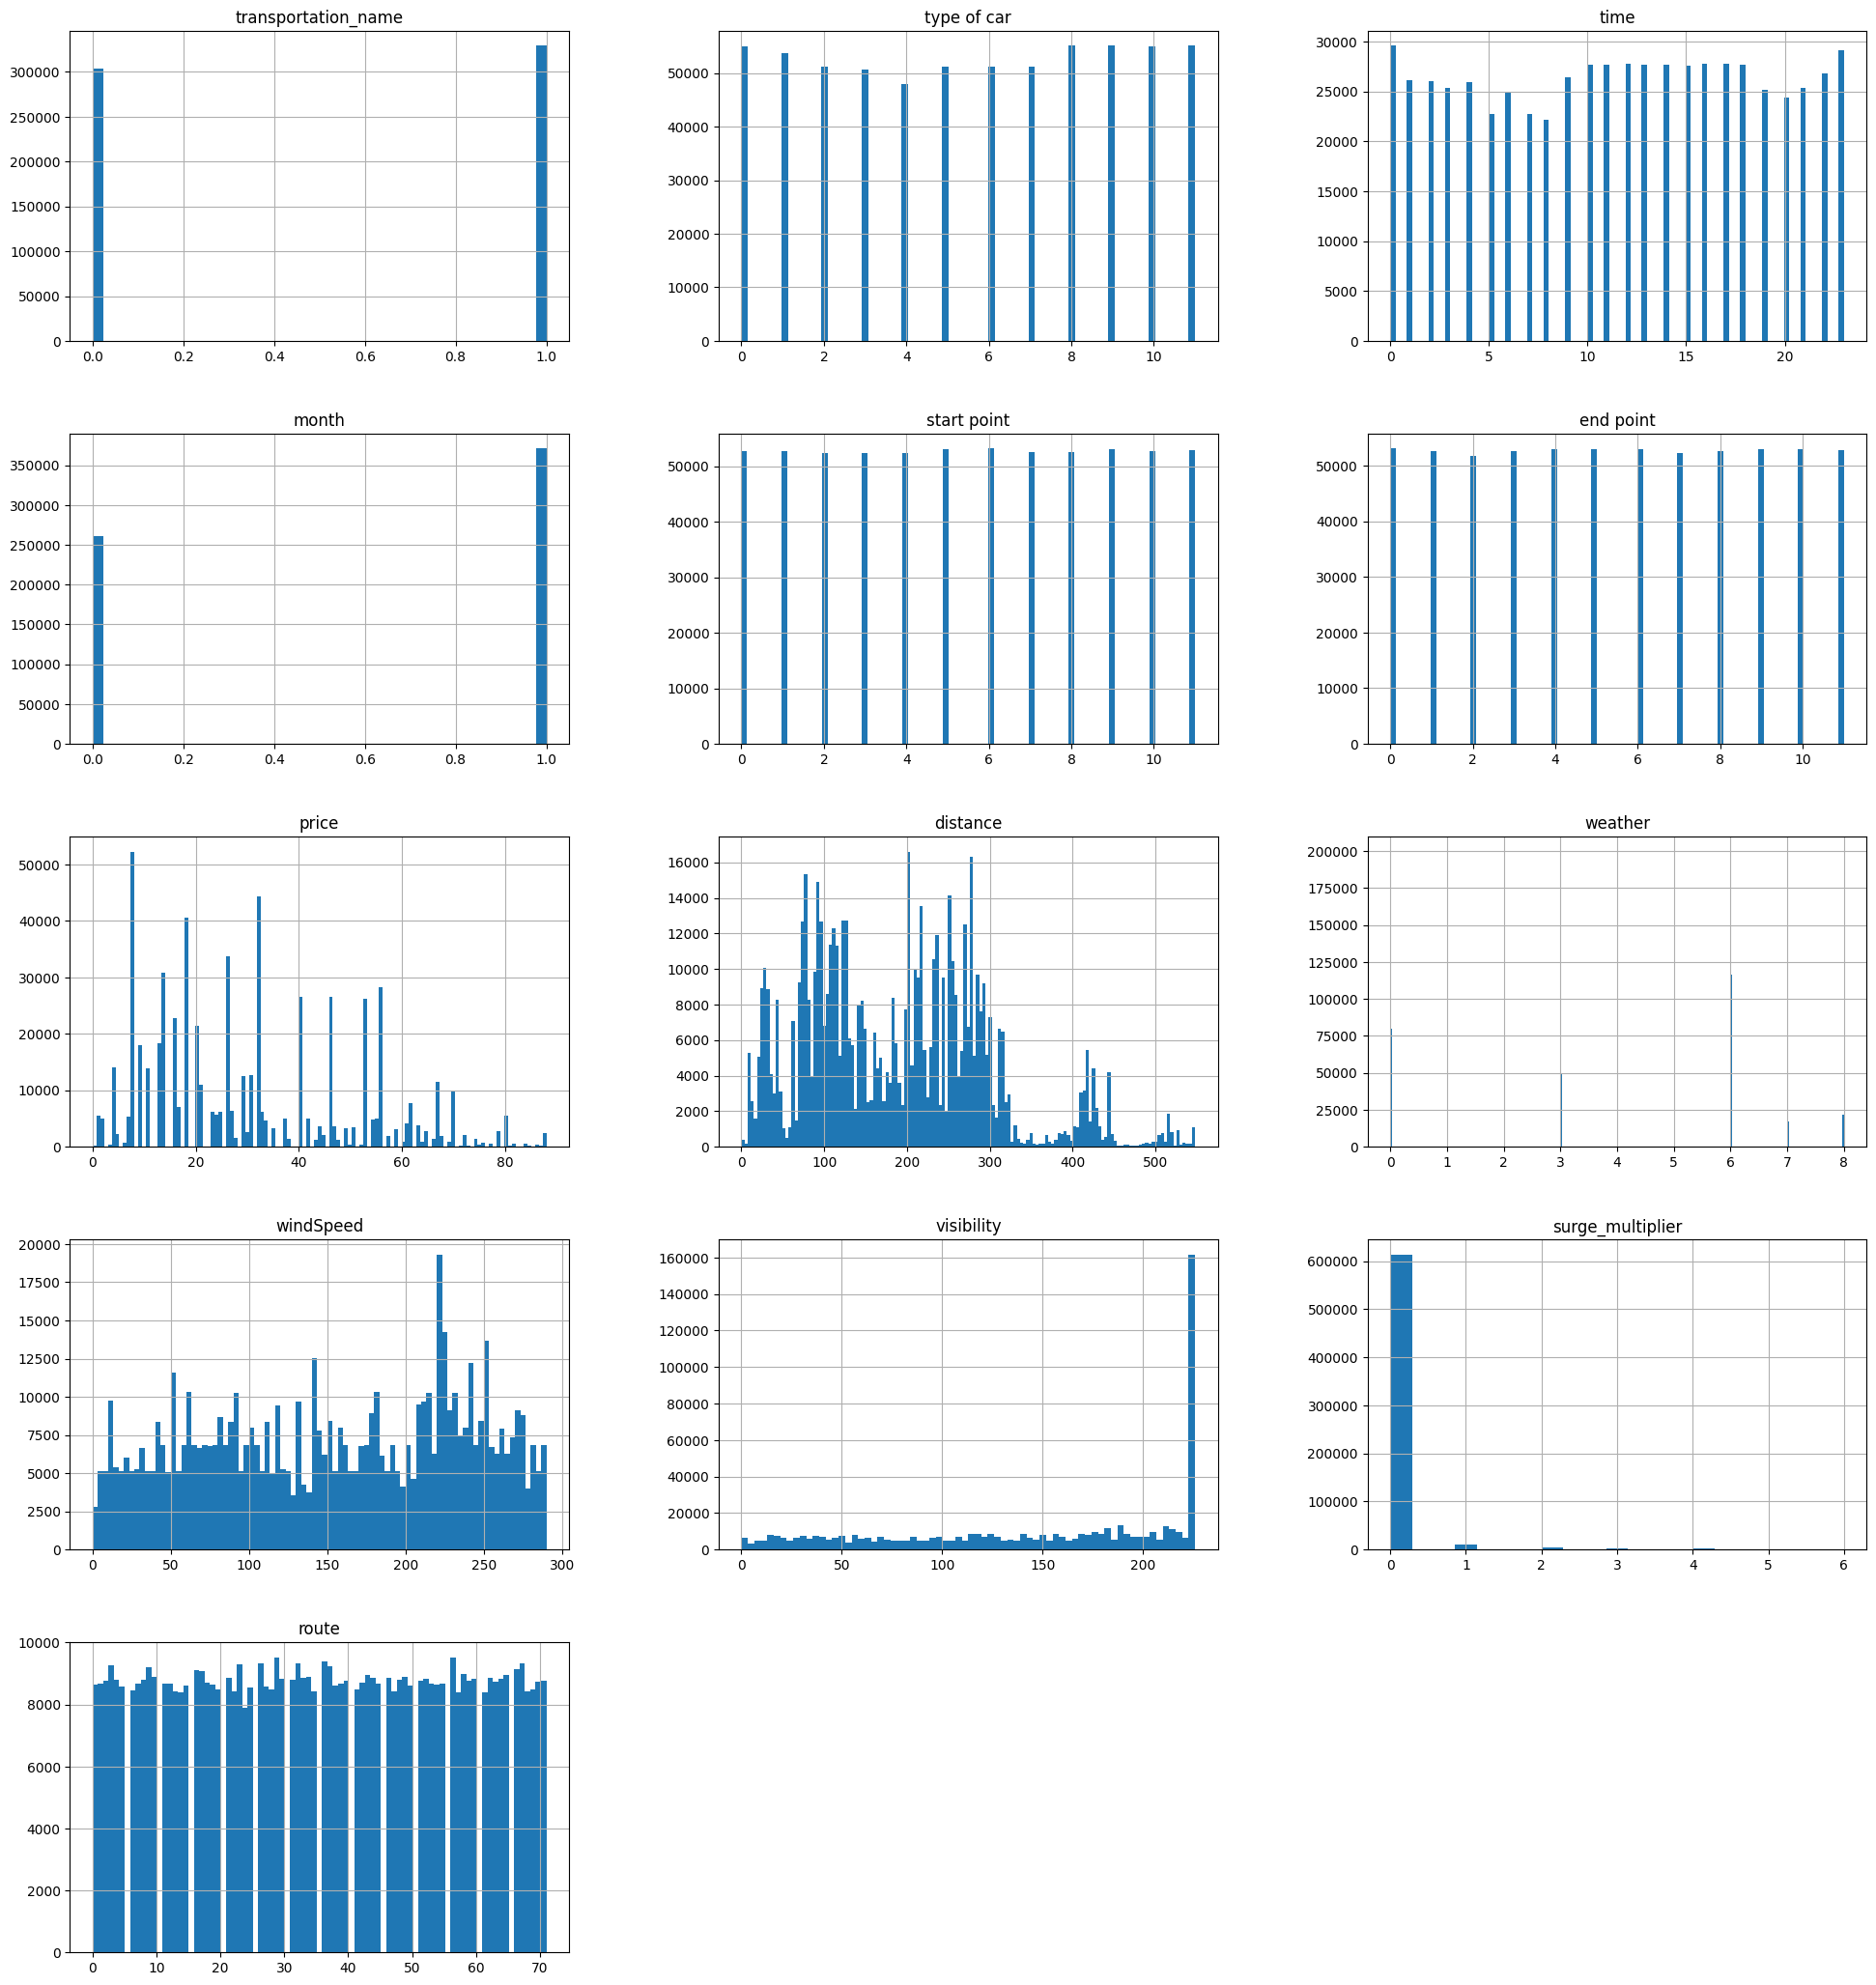

In [39]:
# Melihat distribusi frekuensi
data_rfe.hist(bins='auto',layout=(15,3), figsize=(24,80));

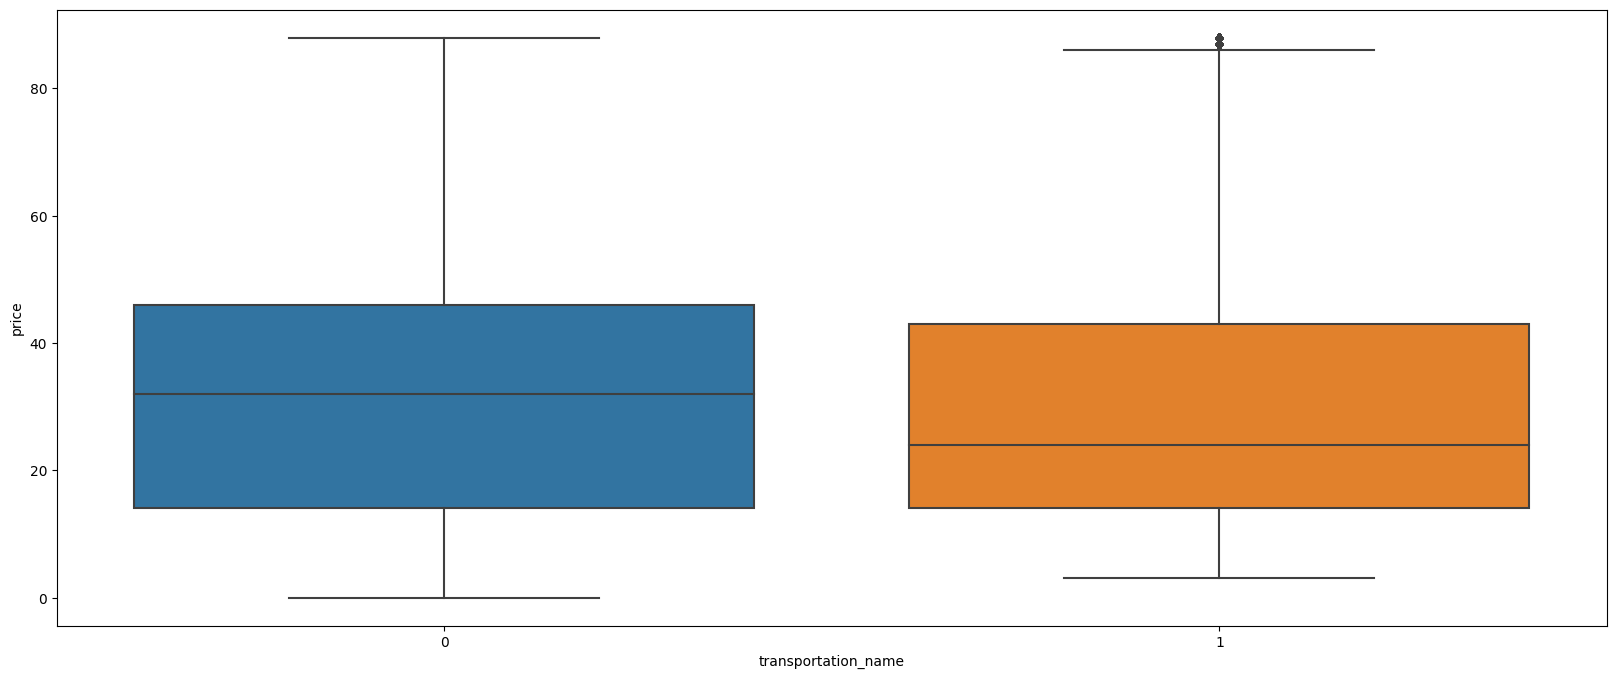

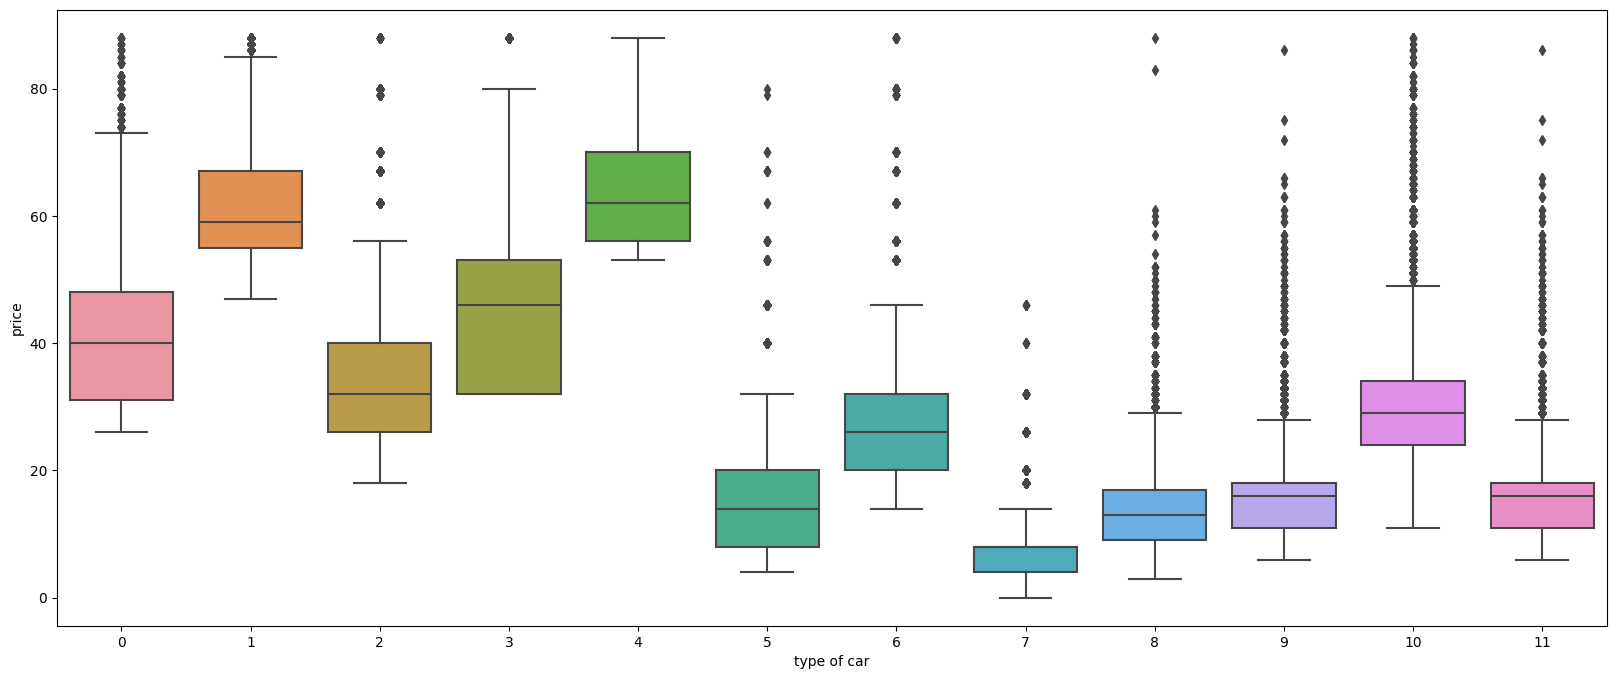

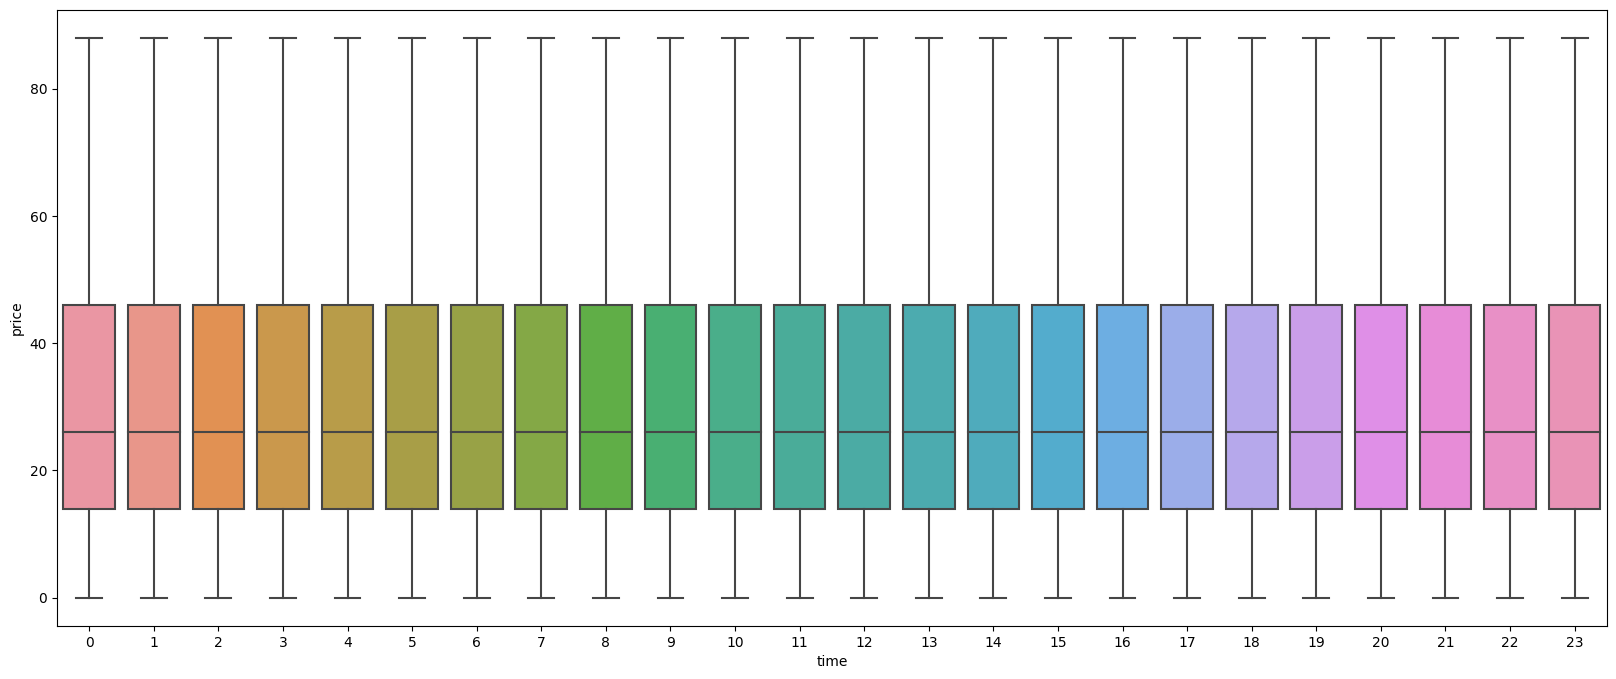

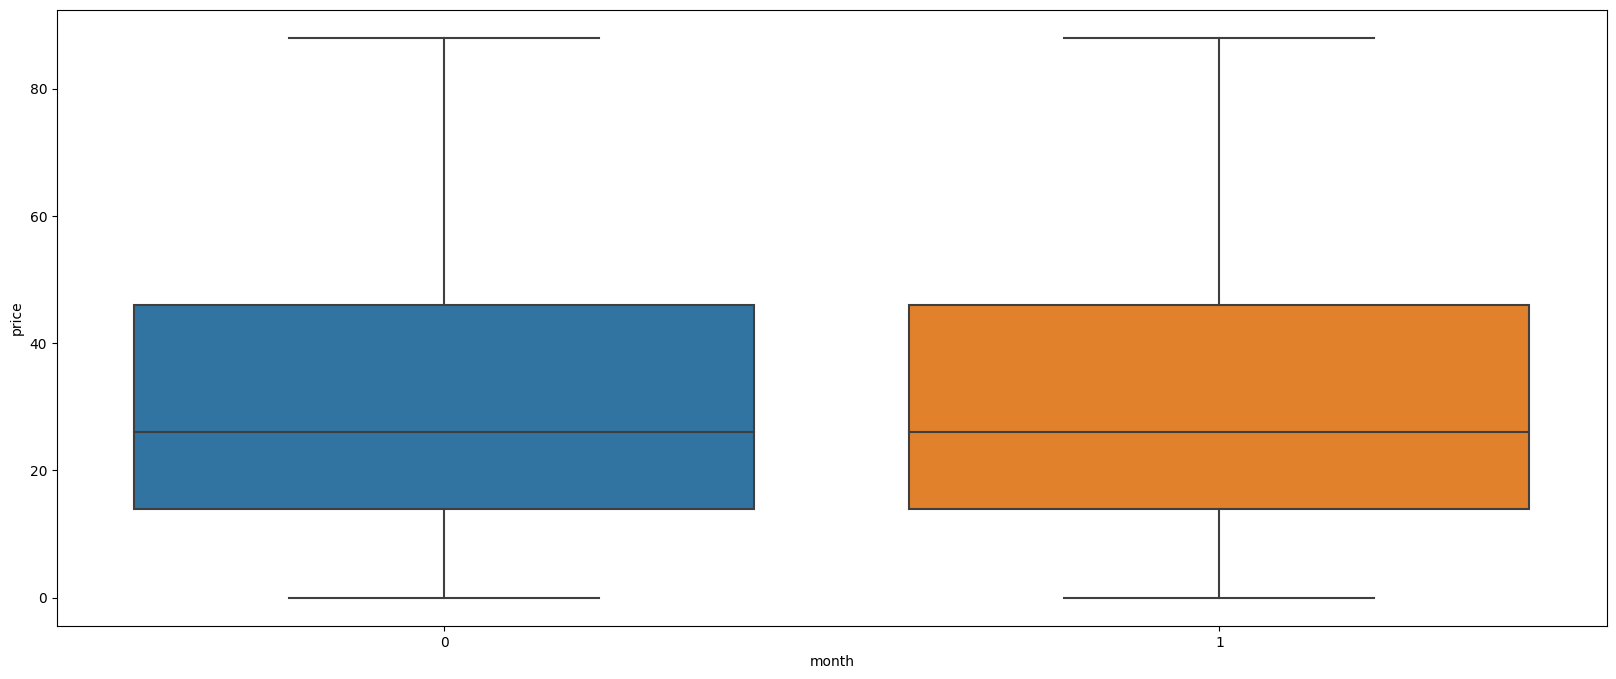

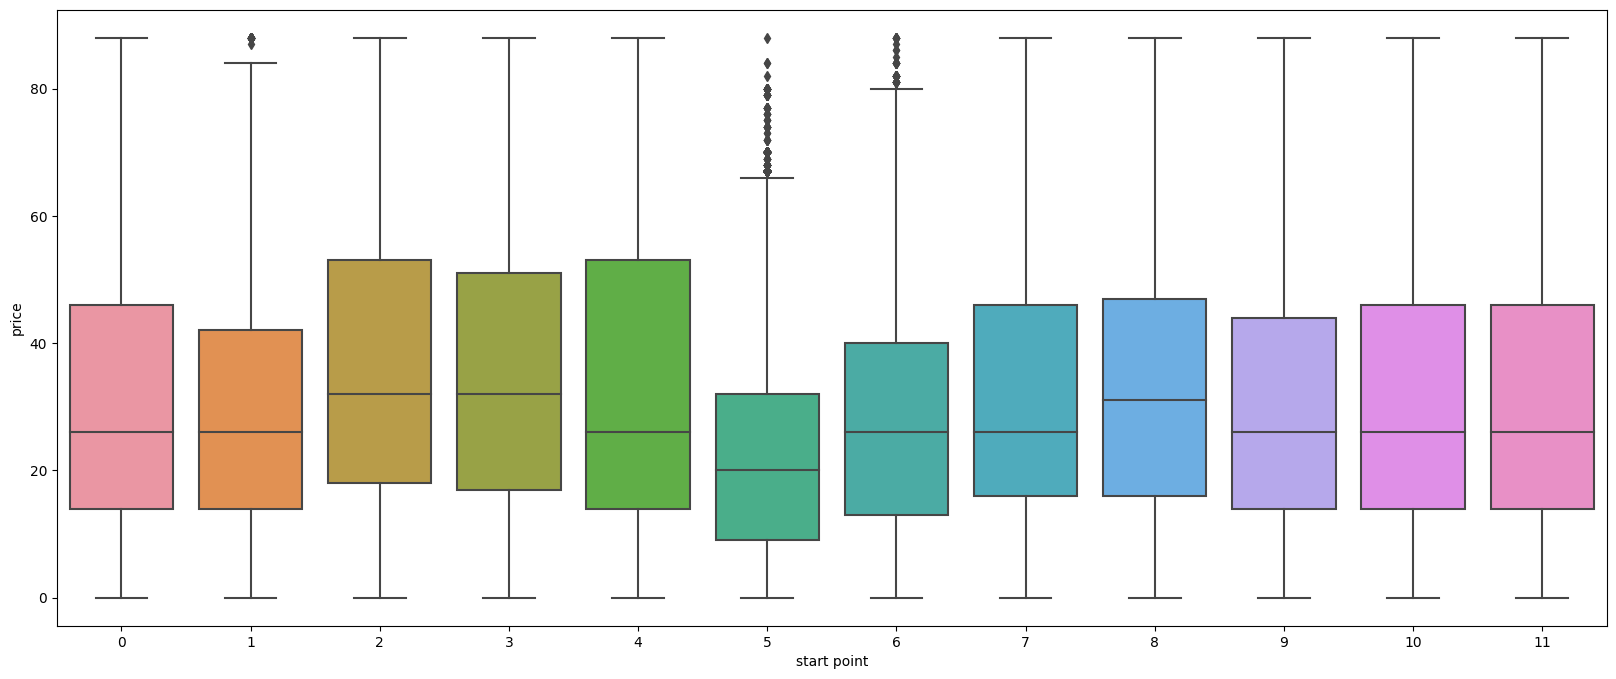

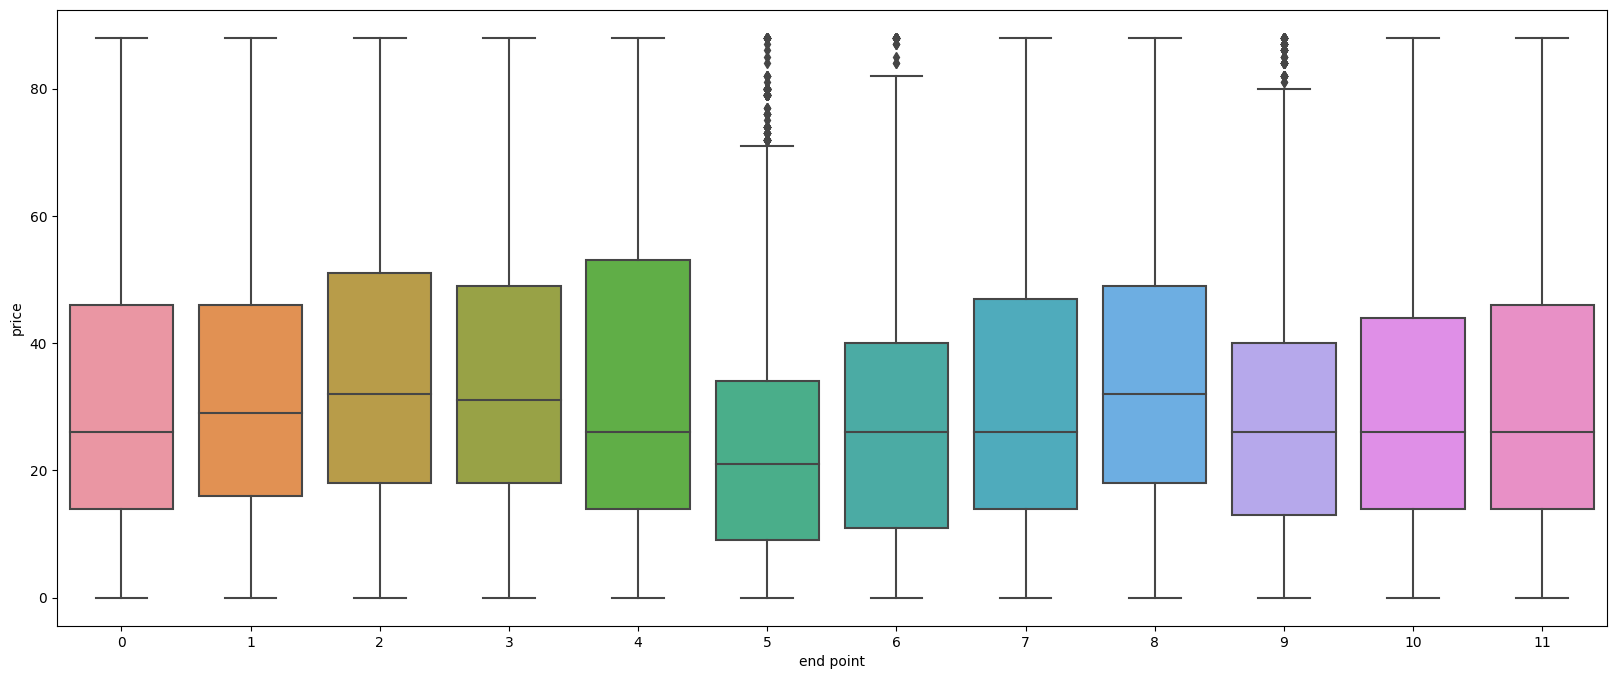

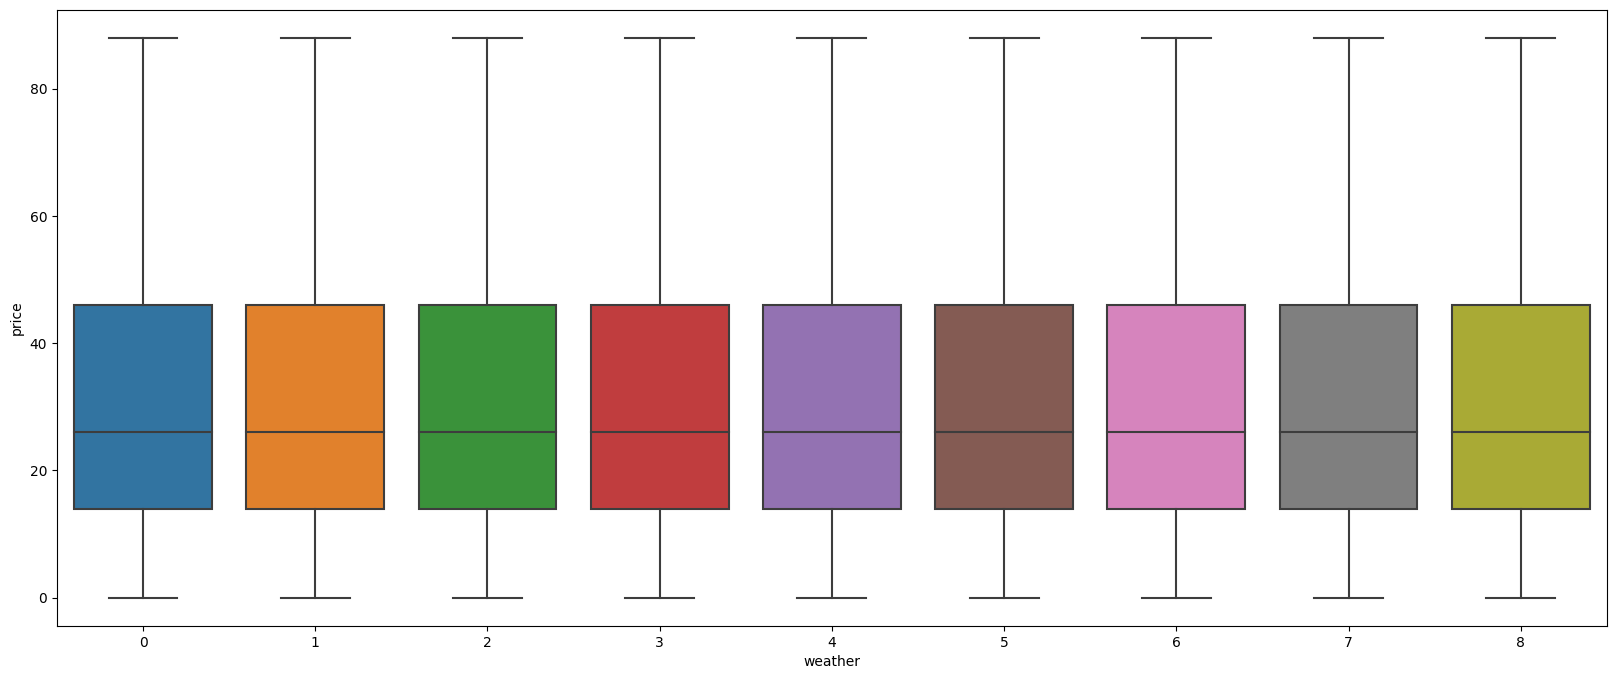

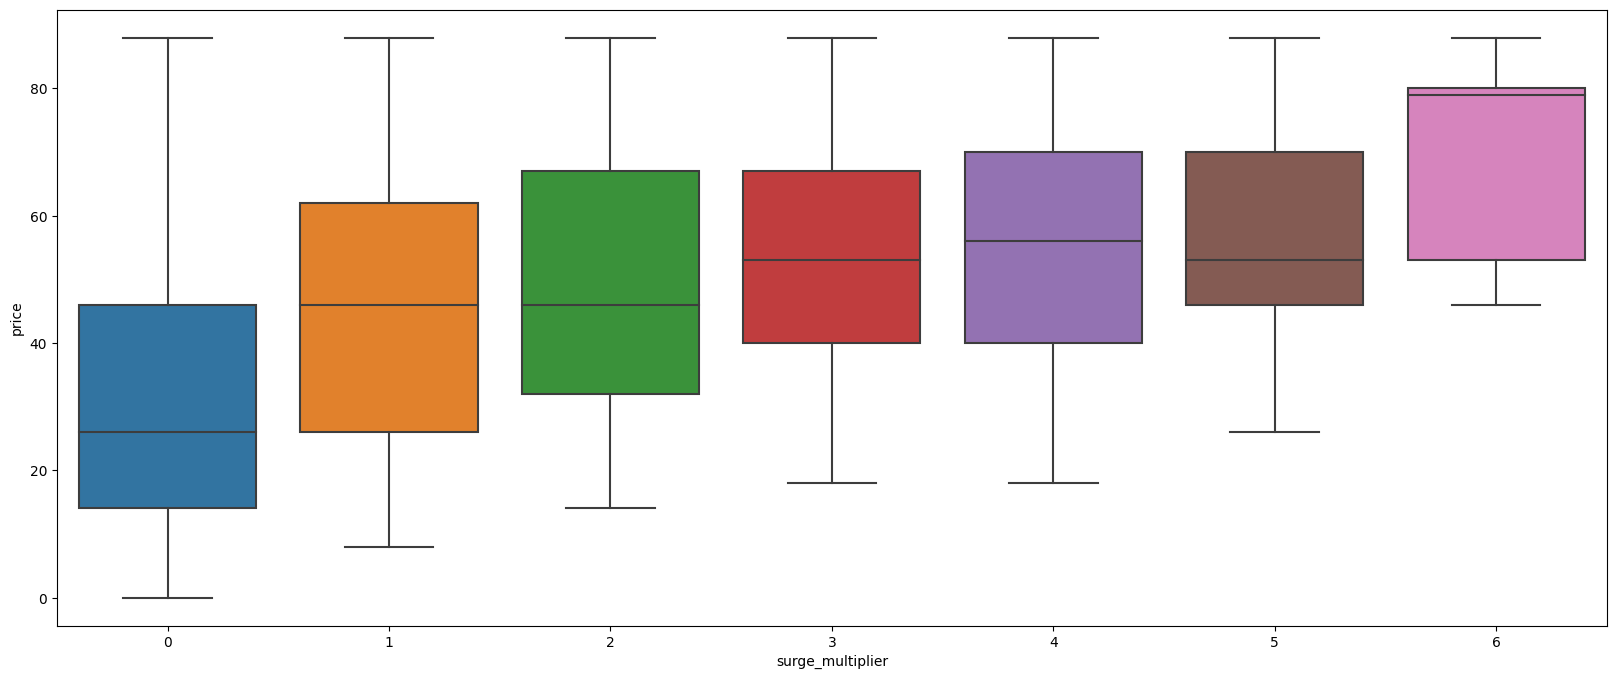

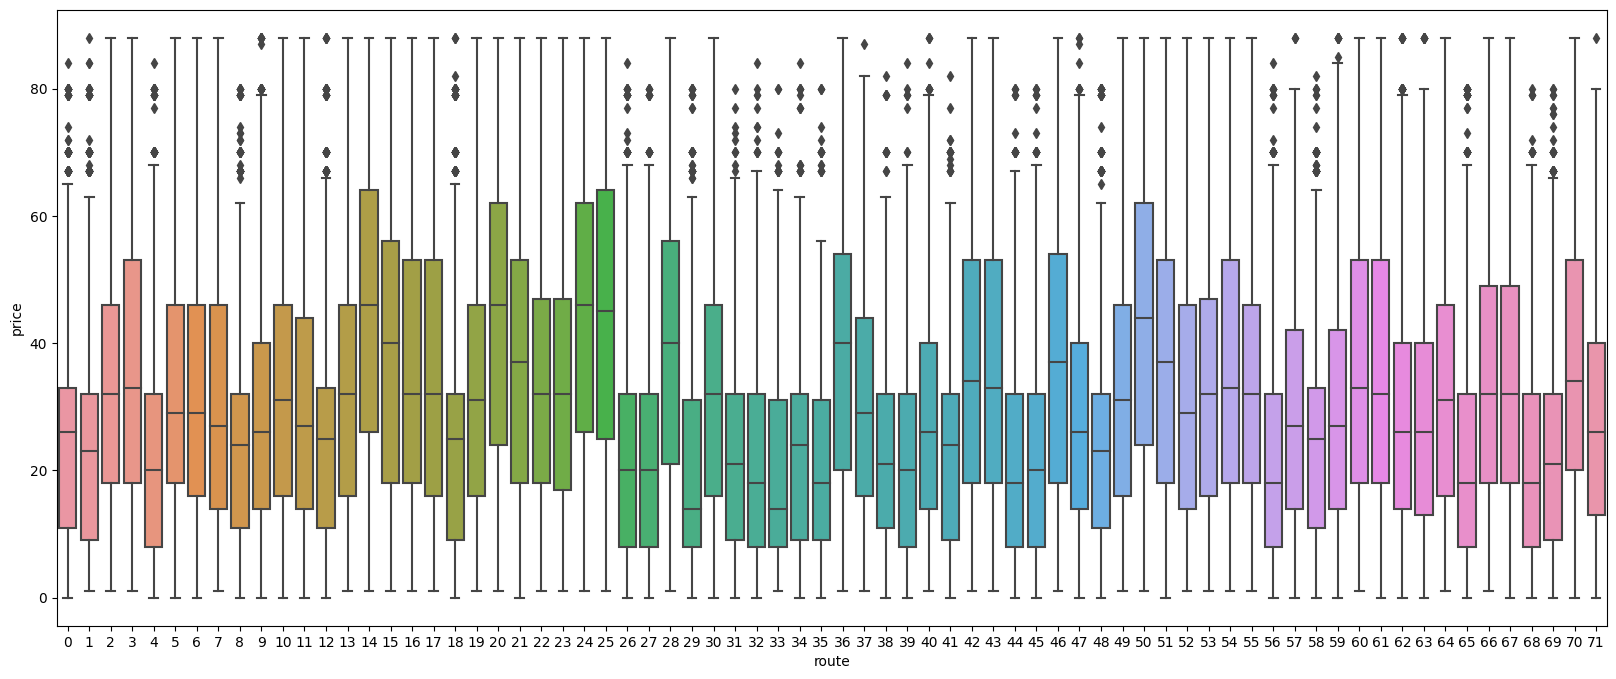

In [40]:
x = data_rfe[["transportation_name", "type of car", "time", "month", "start point", "end point",  "weather",  "surge_multiplier", "route"]]
y = data_rfe["price"]

for categorical in x.columns:
    sns.boxplot(x=x[categorical], y=y, data=data_rfe)
    plt.gcf().set_size_inches((20,8))
    plt.show()

# MODELING

In [41]:
#Spliting data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X_fit, Y, test_size=0.20, random_state=350)

* Implementasi Linear Regression

In [42]:
# Membuat model linear regression
linear_regression = LinearRegression()

# Melatih model dengan data
model=linear_regression.fit(X_train, Y_train)

# Memprediksi menggunakan model yang dilatih
x_new =model.predict(X_test)
lr_train=linear_regression.score(X_train, Y_train)
lr_test=linear_regression.score(X_test, Y_test)

##Menentukan nilai r-square pada nilai testing dan training
print(("Nilai R-squared Training Linear Regression:"),lr_train)
print(("Nilai R-squared Testing Linear Regression:"),lr_test)

# accuracy_linear_regression = accuracy_score(y_test, y_pred_linear_regression)
# mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
# # print("Model accuracy score: {0:0.4f}", accuracy_linear_regression)
# print("Model mse score: ", mse_linear_regression)

Nilai R-squared Training Linear Regression: 0.5085153522200502
Nilai R-squared Testing Linear Regression: 0.5087344535935518


* Implementasi Model Random Forest Regression

In [43]:
# Membuat model Random Forest regressor
rf = RandomForestRegressor(n_estimators = 60, random_state = 15)

# Melatih model dengan data
model_rf=rf.fit(X_train, Y_train)

# Memprediksi menggunakan model yang dilati
rf_predict=model_rf.predict(X_test)
rf_train=rf.score(X_train, Y_train)
rf_test=rf.score(X_test, Y_test)

##Menentukan nilai r-square pada nilai testing dan training
print(("Nilai R-squared Random Regression:"),rf_train)
print(("Nilai R-squared Random Regression:"),rf_test)

Nilai R-squared Random Regression: 0.9862172506839747
Nilai R-squared Random Regression: 0.9611498112240162


* Implementasi Decision Tree Regressor

In [44]:

# # Membuat model Decision Tree
decision_tree= DecisionTreeRegressor()

# # Melatih model dengan data
model_dtr=decision_tree.fit(X_train, Y_train)

# # Memprediksi menggunakan model yang dilatih
DTR_predict = model_dtr.predict(X_test)
r2_DTR_Train = decision_tree.score(X_train, Y_train)
r2_DTR_Test = decision_tree.score(X_test, Y_test)

#Menentukan nilai r-square pada nilai testing dan training
print(("Nilai R-squared Training Decision Tree:"),r2_DTR_Train)
print(("Nilai R-squared Testing Decision Tree:"),r2_DTR_Test)


Nilai R-squared Training Decision Tree: 0.9890504580199851
Nilai R-squared Testing Decision Tree: 0.9459902902384738


In [45]:
X_new = {'transportation_name': [0, 1, 2, 3], 'type of car': [0, 1, 2, 3], 'start point': [0, 1, 2, 3], 'end point': [0, 1, 2, 3], 'visibility': [0, 1, 2, 3], 'weather': [0, 1.25, 2, 3], 'distance': [0, 1, 2, 3],
         'surge_multiplier': [0, 1, 2, 3]}
X_new = pd.DataFrame(X_new)

In [46]:
price_predict_lr= model.predict(X_new)
print('Prediksi Tarif Transportasi Online dengan Model Linear Regression: ')
print(price_predict_lr)

Prediksi Tarif Transportasi Online dengan Model Linear Regression: 
[36.03928682 45.18959447 54.33663045 63.48530227]


In [47]:
price_predict_RF = model_rf.predict(X_new)
print('Prediksi Tarif Transportasi Online dengan Model Random Forest: ')
print(price_predict_RF)

Prediksi Tarif Transportasi Online dengan Model Random Forest: 
[23.1        56.31666667 43.98333333 54.88333333]


In [48]:
price_predict_DTR = model_dtr.predict(X_new)
print('Prediksi Tarif Transportasi Online dengan Model Decision Tree: ')
print(price_predict_DTR)

Prediksi Tarif Transportasi Online dengan Model Decision Tree: 
[18. 55. 55. 55.]


In [49]:
pickle.dump(linear_regression,open('model.pkl','wb'))
pickle.dump(rf,open('model_rf.pkl','wb'))
pickle.dump(decision_tree,open('model_dtr.pkl','wb'))

# Kesimpulan : 
1. Parameter yang mempengaruhi prediksi tarif transportasi online yaitu: **type of car, transport name, start point, end point, weather, visibility, route,** dan **surge multiplier**. 
2. Terdapat 3 metode pengujian dengan masing-masing model yaitu linear regression, random forest, dan decision tree dengan masing-masing model memiliki nilai r-squared atau akurasi sebesar 50.87%, 96.11%, dan 94.62%. 
3. Model terbaik untuk memprediksi harga transportasi online ialah **model Random Forest**. 
